In [1]:
library(readxl)
library(timedeppar)

Loading required package: mvtnorm



In [2]:
# likelihood function
loglikeli <- function(param, data) {
    xi <- param$xi[,2]
    
    # build time series from intervals
    t <- cumsum(xi)
    
    # calculate frequency
    period <- 11 # years
    omega <- 2 * pi / period
    
    y_model <- param$A * cos(omega * t + param$phi)
    
    result <- sum(dnorm(data[[2]], mean=y_model,
                        sd=param$sigma_y, log=TRUE))
    return(result)
}

# function that runs the sampler
sampler <- function(data) {
    res <- infer.timedeppar(
        data = data,
        loglikeli = loglikeli,
        param.ini = list(
            xi = matrix(c(data[[1]], rep(1, nrow(data))), ncol=2),
            A = A_init,
            phi = phi_init,
            sigma_y = sigma_y_init),
        param.ou.ini = c(
            xi_mean = xi_mean_init,
            xi_sd = xi_sd_init,
            xi_gamma = 1),
        param.range = list(
            A = c(1, 10),
            phi = c(0, 2*pi),
            sigma_y = c(0.01, 10),
            xi = c(0.1, 2),
            xi_mean = c(-10, 10),
            xi_sd = c(0.01, 10),
            xi_gamma = c(0.05, 20)),
        param.log = c(
            A=FALSE, 
            phi=FALSE, 
            sigma_y=TRUE, 
            xi=TRUE),
        n.iter = n.iter,
        control = list(n.interval = n.interval),
        verbose = 0)

    plot(res)

    return(res)
}

# import datasets
col_names <- c("Year_1", "Cycle_1", "blank1", "Year_2", 
               "Cycle_2", "blank2", "Year_3", "Cycle_3")
df <- read_excel("./data/syntheticData.xlsx", skip=4, 
                 col_names=col_names)
df1 <- df[,c(1,2)]
df2 <- df[,c(4,5)]
df3 <- df[,c(7,8)]

In [3]:
# specify initial parameters of the model
A_init <- 5
phi_init <- 0
sigma_y_init <- 1

# specify constants and initial values for parameters of OU proccesses
xi_mean_init <- 1
xi_sd_init <- 0.3
xi_gamma <- 5

# specify simulation parameters
n.iter <- 1000
n.interval <- 50

### Table 1

infer.timedeppar (timedeppar 1.0.3 2023-08-28): starting new Markov Chain

  number of constant parameters:          3

  number of time-dependent parameters:    1

  number of estimated process parameters: 3

1000 iterations completed

  acceptance frequency of constant parameters:             NA

  acceptance frequencies of time-dependent parameters:     NA

  acceptance frequencies of Ornstein-Uhlenbeck parameters: NA

plot.timedeppar (timedeppar 1.0.3 2023-08-28): plotting inference results: traces,marginals,summary,pairs,time-series,accept

Warning message in plot.timedeppar(res):
“analysis is done using data from the adaptation or burnin phase”


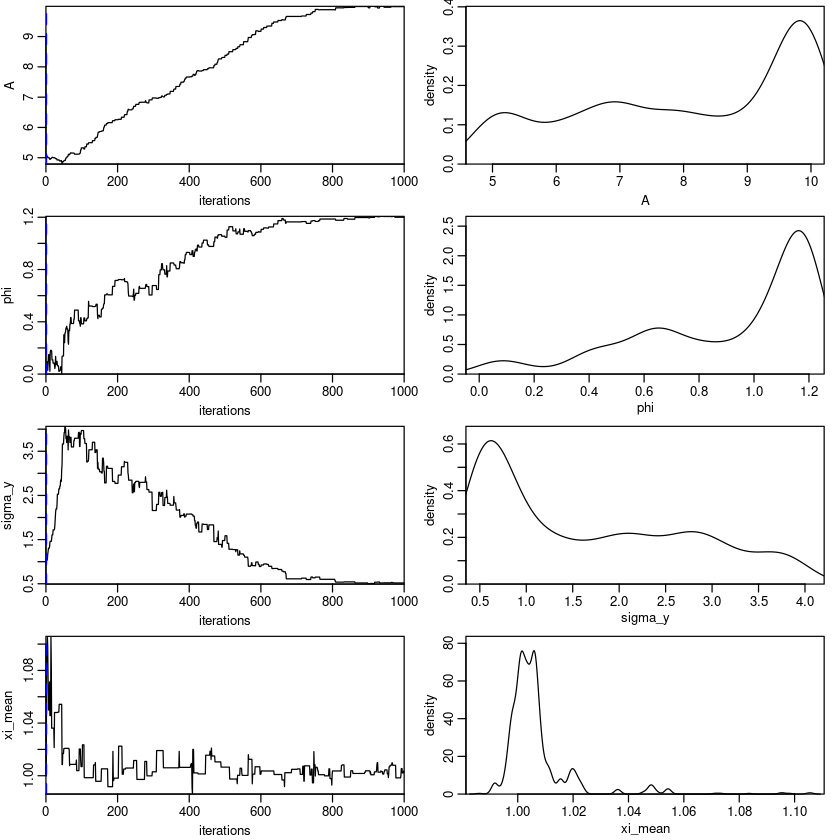

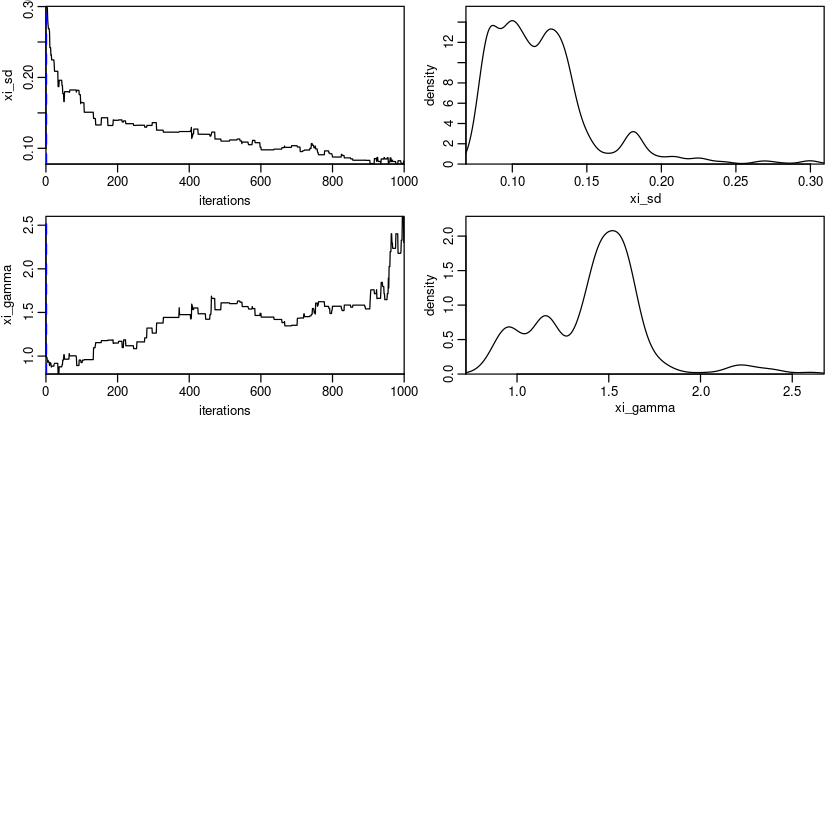

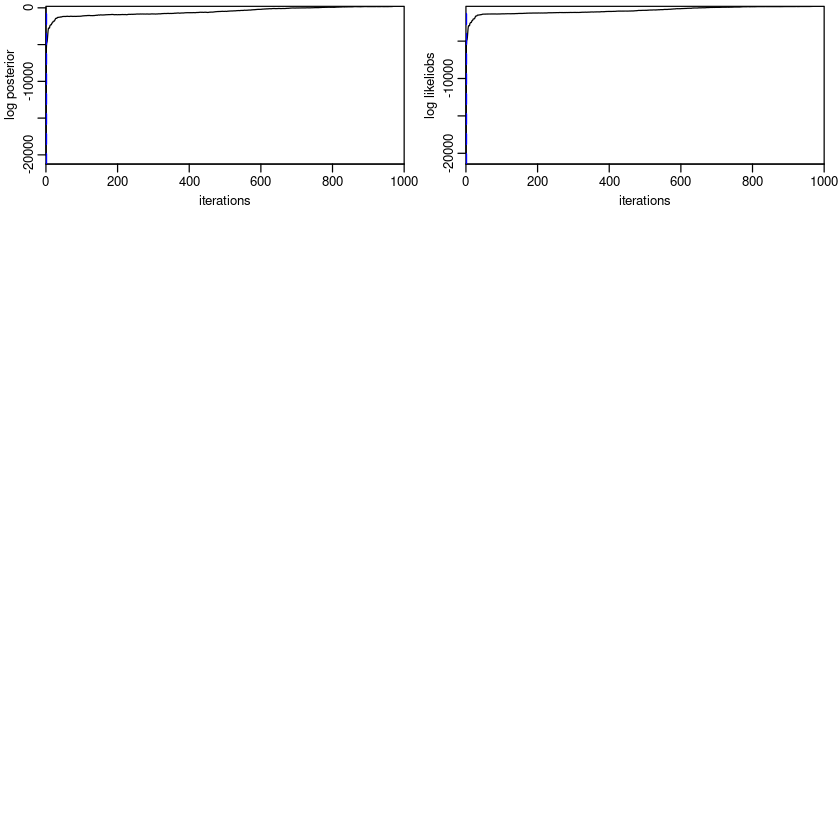

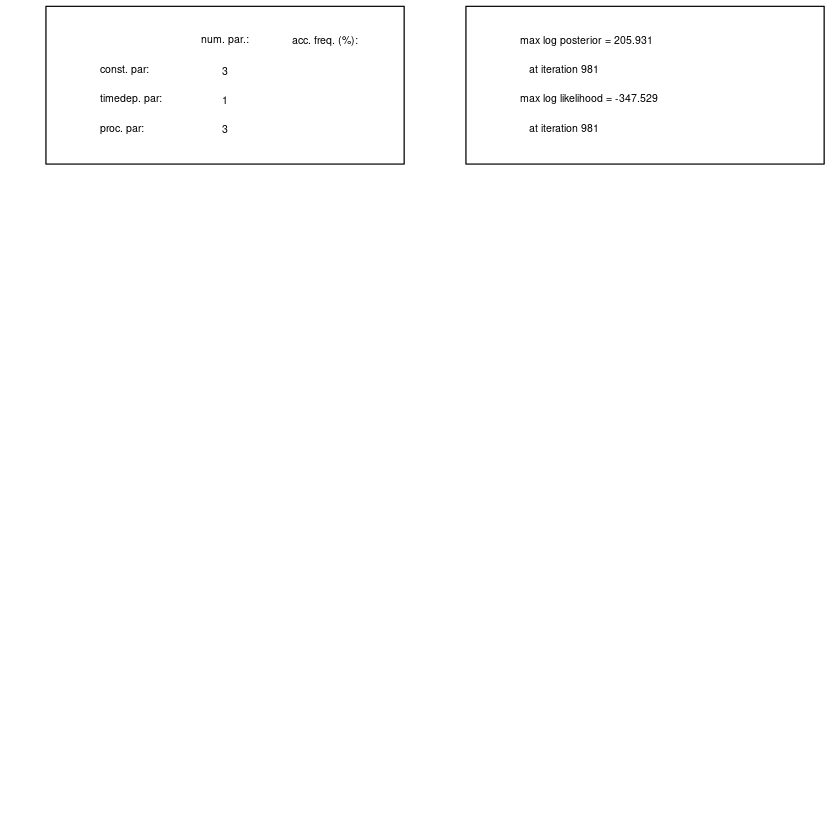

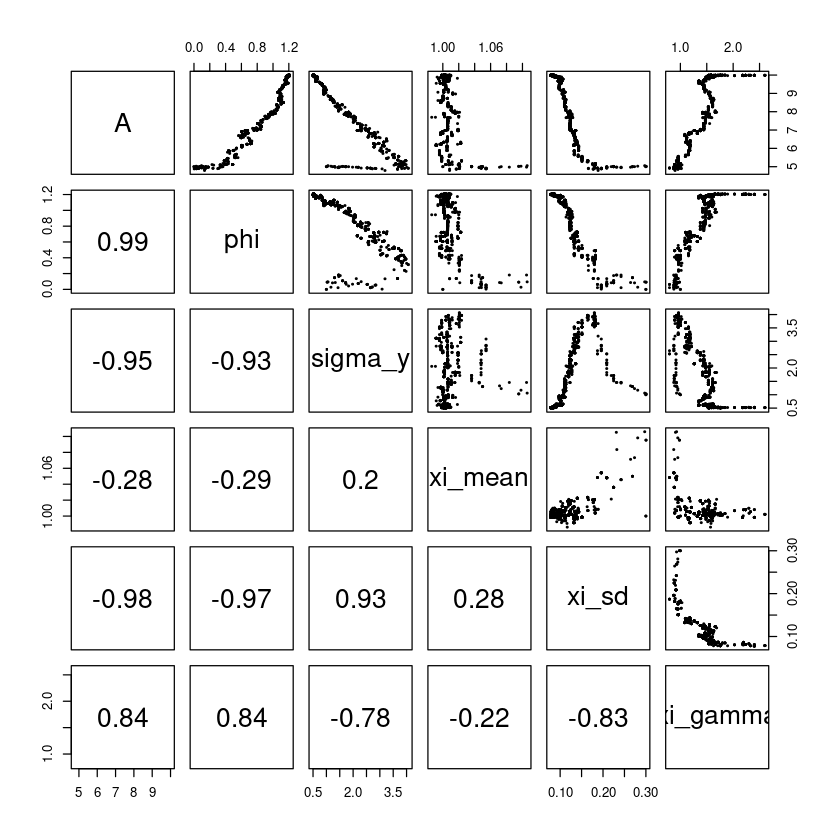

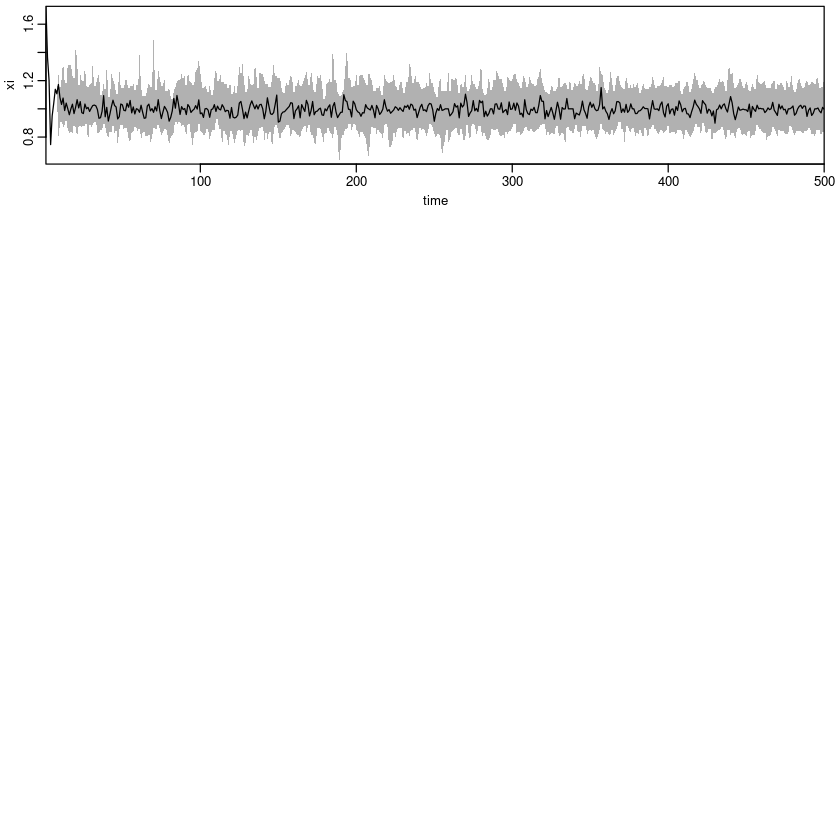

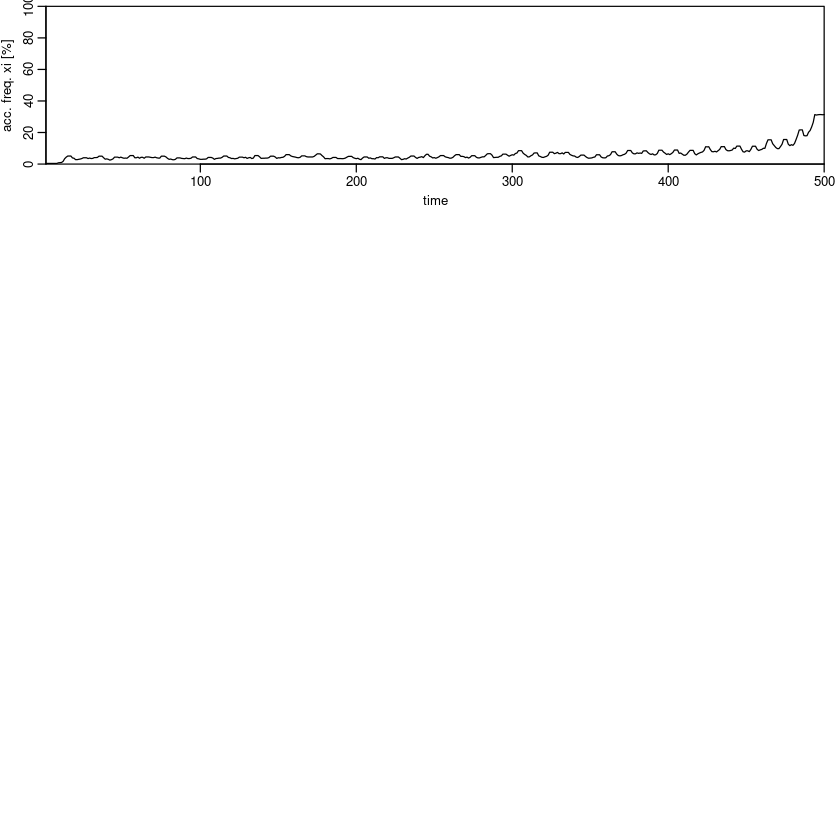

In [4]:
res1 = sampler(df1)

# Commands

In [5]:
# res$sample.param.timedep$xi
# res$sample.param.const
# res$sample.param.ou
# res$sample.logpdf